In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
races_colors = {"white":"blue", "black":"orange", "hispanic":"green", "asian": "red", "other":"purple"}

In [ ]:
def label_race(id:int)->str:  
    if id in [1, 2, 3, 4]:
        return 'asian'
    elif id in [5, 6, 7, 8]:
        return'hispanic'

    elif id in [9, 10]:
        return 'black'

    elif id == 11:
        return 'white'

    else:
        return 'other'

In [ ]:
data_dir = os.path.join(os.curdir, "..", "data")
file_path = os.path.join(data_dir, "raw.csv")
data = pd.read_csv(file_path, low_memory=False)

In [ ]:
data.head()

,work_status,children_HH,adults_HH,V00995,professional_seen,age_talk_prof,recieved_helpful_treatment,total_profs_seen_1,treatment_past_12mthns,V01012,...,social worker,counselor,non-MD,spiritual advisor,healer,psychologist,depress_diagnos,identify_ethnicity,employment,nonpre_meds_taken
0,1.0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1
1,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1
2,3.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1
3,1.0,0,2,1.0,4.0,25-50,1.0,2.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1
4,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.0,1


In [ ]:
data["RANCEST"] = data["RANCEST"].apply(label_race)

In [ ]:
races = data["RANCEST"].unique()
races

array(['asian', 'hispanic', 'white', 'black', 'other'], dtype=object)

In [ ]:
new_data = data.copy(deep=True)
new_data.dropna(subset=["income"], inplace=True)
races_incomes = pd.DataFrame(columns=new_data["income"].unique(), index=races)
for race in races:
    race_count = len(new_data[new_data["RANCEST"] == race])
    races_incomes.loc[race] = new_data[new_data["RANCEST"] == race]["income"].value_counts() / race_count * 100
races_incomes

,100K - 150K,25K-50K,>150K,50K-75K,75K-100K,0-25K
asian,14.141414,20.523416,13.498623,14.462810,12.672176,24.701561
hispanic,6.066176,25.520833,5.085784,14.399510,7.475490,41.452206
white,9.524749,27.095247,6.113193,20.252416,11.338986,25.675409
black,2.637555,31.633188,1.432314,11.266376,5.240175,47.790393
other,4.864865,31.351351,3.243243,14.054054,4.324324,42.162162


In [ ]:
races_incomes.columns

races_incomes = races_incomes[['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K - 150K', '>150K']]

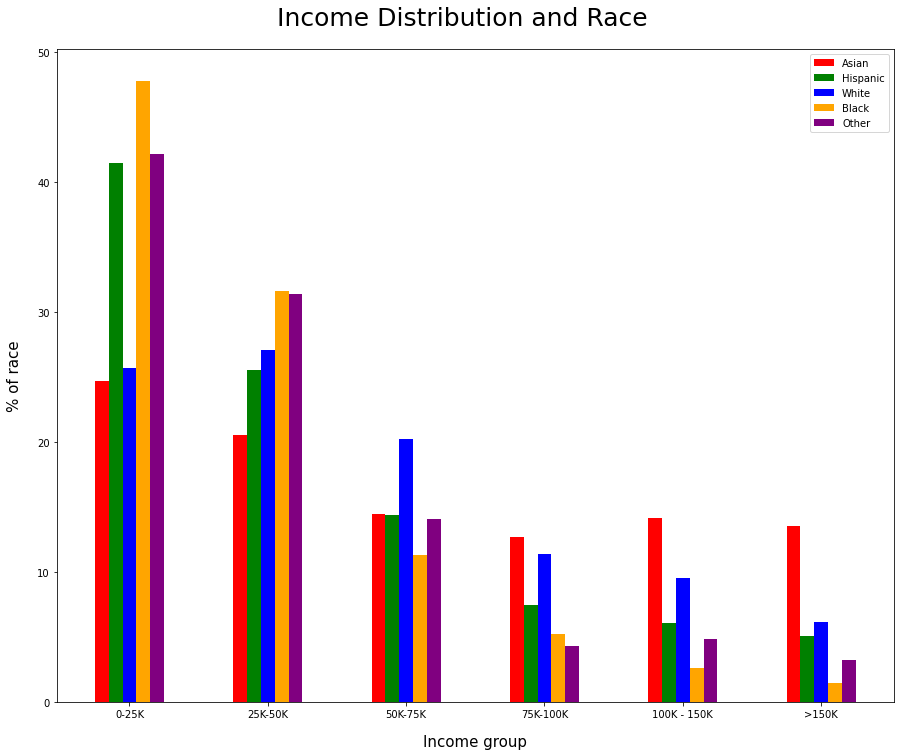

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

# set width of bar
width = 0.1
 
r = np.arange(len(races_incomes.columns)) - 2 * width
for race in races:
    ax.bar(r, races_incomes.loc[race], width=width, label=race.capitalize(), color=races_colors[race])
    r = [x + width for x in r]

ax.legend()

ax.xaxis.set_ticks(ticks=np.arange(len(races_incomes.columns)))
ax.xaxis.set_ticklabels(races_incomes.columns.tolist())
fig.suptitle("Income Distribution and Race", fontsize=25, y=0.93)
ax.set_ylabel("% of race", fontdict=dict(size=15), labelpad=15)
ax.set_xlabel("Income group", fontdict=dict(size=15), labelpad=15)

fig.show()


In [ ]:
treatment = new_data[pd.notna(new_data["V00995"])]
income_treatment = treatment[treatment["V00995"] == 1]["income"].value_counts()
for income in income_treatment.index:
    income_count = len(treatment[treatment["income"] == income])
    income_treatment.loc[income] /= income_count
    

    

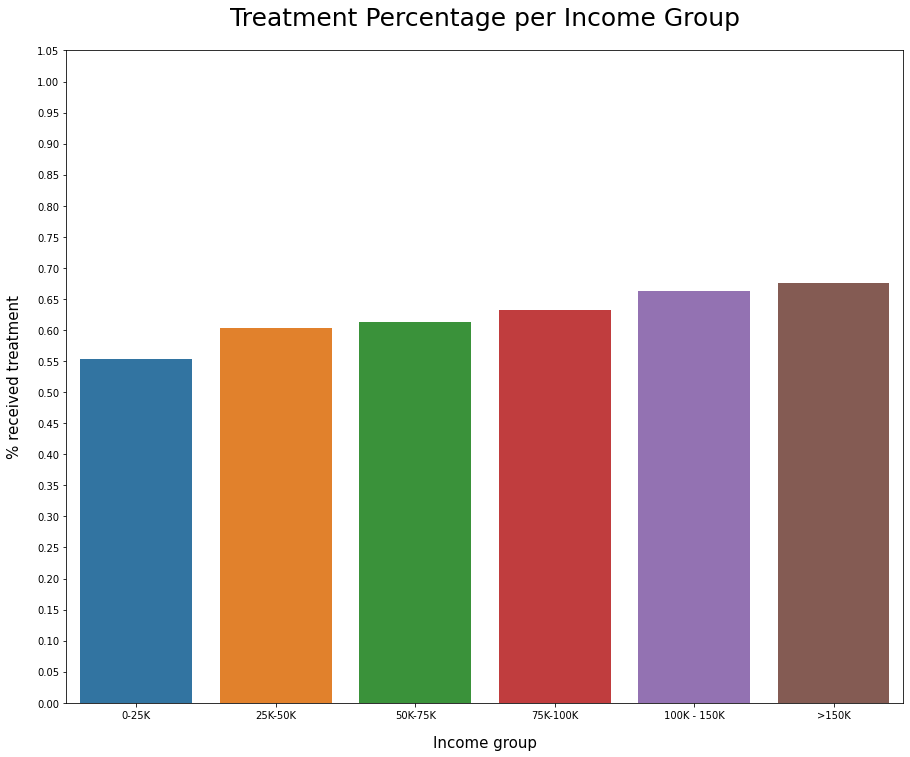

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(x=income_treatment.index, y=income_treatment.values, ax=ax)
ax.set_title(label="Treatment Percentage per Income Group", fontdict=dict(size=25), pad=25)

ax.set_yticks(np.arange(0, 1.1, 0.05))
ax.set_ylabel("% received treatment", fontdict=dict(size=15), labelpad=15)
ax.set_xlabel("Income group", fontdict=dict(size=15), labelpad=15)

fig.show()